In [1]:
# 安裝所需套件
from sklearn import metrics
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## EDA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

## 過採樣
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline


# 績效指標
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## 建模
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA

from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LinearRegression


from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb

C:\Users\USER\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\USER\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\USER\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\USER\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

In [2]:
#load data
df2 = pd.read_csv("C:/Users/USER/Desktop/secondphase_test.csv")

# 將與weather_delay無關的特徵刪除
df2.drop(["CRS_DEP_TIME","DEP_TIME","DEP_DELAY","CRS_ARR_TIME","ARR_TIME","ARR_DELAY"
          ,"CRS_ELAPSED_TIME","ACTUAL_ELAPSED_TIME","AIR_TIME"],axis=1,inplace=True)

#將target欄位移至最後一欄
target_col = df2.pop(df2.columns[4])
df2.insert(18, target_col.name, target_col)

In [3]:
# 1. 類別變數轉換
# 值之間沒有大小的意義，用One-Hot(使用get_dummies)

dummy = pd.get_dummies(df2[['ORIGIN','DEST']])

# 將轉換後產生的dataframe塞入原始df2，並刪除ORIGIN、DEST
df2 = pd.concat([dummy,df2],axis=1)
df2.drop(['ORIGIN','DEST'],axis=1,inplace=True)

In [4]:
df2

,ORIGIN_DAL,ORIGIN_HOU,ORIGIN_STL,DEST_BNA,DEST_DAL,DEST_HOU,Day,DISTANCE,DEP_HOUR,ARR_HOUR,...,DEP_HOURLYWindSpeed,DEP_HOURLYPrecip,DEP_evaporation,ARR_HOURLYVISIBILITY,ARR_HOURLYDewPointTempC,ARR_HOURLYRelativeHumidity,ARR_HOURLYWindSpeed,ARR_HOURLYPrecip,ARR_evaporation,WEATHER_DELAY
0,0,1,0,0,1,0,1,239.0,15,16,...,11.0,0.00,6.5,6.0,16.1,24.0,7.0,0.0,5.2,2.274820
1,0,1,0,0,1,0,2,239.0,17,18,...,7.0,0.00,2.6,6.0,20.0,48.0,3.0,0.0,6.4,46.000000
2,0,1,0,1,0,0,3,670.0,17,19,...,6.0,0.00,6.6,10.0,17.2,69.0,8.0,0.0,3.8,5.000000
3,0,1,0,0,1,0,3,239.0,17,18,...,6.0,0.00,6.6,10.0,12.2,25.0,0.0,0.0,5.3,2.873459
4,0,1,0,1,0,0,4,670.0,17,19,...,5.0,0.00,5.7,10.0,15.6,64.0,6.0,0.0,4.2,1.008619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0,1,0,0,1,0,19,239.0,16,18,...,7.0,0.02,1.8,2.5,21.1,84.0,24.0,0.1,2.0,36.000000
59,0,1,0,0,1,0,19,239.0,16,18,...,7.0,0.02,1.8,2.5,21.1,84.0,24.0,0.1,2.0,9.000000
60,0,1,0,0,1,0,19,239.0,17,18,...,6.0,0.01,1.4,2.5,21.1,84.0,24.0,0.1,2.0,12.000000
61,1,0,0,0,0,1,9,239.0,15,16,...,14.0,0.00,6.6,10.0,22.2,65.0,11.0,0.0,4.7,2.704114


In [5]:
## 由於features中有不用標準化的欄位(dummy)，加上標準化、split的返回結果是ndarray，
## 因此要把不需要標準化的欄位獨立出來

# 1.切分成訓練集、驗證集
X = df2.iloc[:,:-1].values 
y = df2.iloc[:,-1].values
y = np.log1p(y)

X_trainval,X_test,y_trainval,y_test = train_test_split(X,y,test_size = 0.2,random_state = 10) 

# 2. 記錄不用標準化的欄位(type = dataframe)

# ndarray to df
Xtrainval = pd.DataFrame(X_trainval,columns = [str(i) for i in range(X_trainval.shape[1])])
Xtest = pd.DataFrame(X_test,columns = [str(i) for i in range(X_test.shape[1])])

## 目標df
X_trainval_temp = Xtrainval[["0","1","2","3","4","5",'6',"8","9"]]
X_test_temp = Xtest[["0","1","2","3","4","5",'6',"8","9"]]

# 3. df to ndarray
X_trainval_new = Xtrainval.to_numpy()
X_test_new = Xtest.to_numpy()

# 4. 標準化
sc = StandardScaler().fit(X_trainval)
x_train_std = sc.transform(X_trainval) ## 將規則用在訓練集
x_test_std = sc.transform(X_test) ## 將規則用在測試集

# 5. 將沒標準化的features放回df中
xtrainval = pd.DataFrame(X_trainval,columns = [str(i) for i in range(X_trainval.shape[1])])
xtest = pd.DataFrame(X_test,columns = [str(i) for i in range(X_test.shape[1])])

xtrainval.drop(["0","1","2","3","4","5",'6',"8","9"],axis=1,inplace=True)
xtest.drop(["0","1","2","3","4","5",'6',"8","9"],axis=1,inplace=True)

del X_trainval
del X_test

X_trainval = pd.concat([X_trainval_temp,xtrainval],axis=1)
X_test = pd.concat([X_test_temp,xtest],axis=1)

# df to ndarray(為了進行SMOTE&CV)
X_trainval = X_trainval.to_numpy()
X_test = X_test.to_numpy()

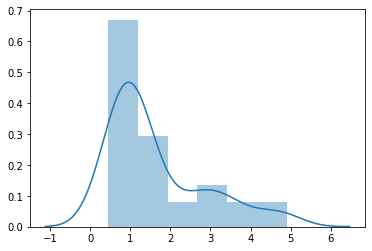

In [6]:
sns.distplot(y_trainval)
#df2.loc[:,"WEATHER_DELAY"] = np.log1p(df2["WEATHER_DELAY"])
plt.show()

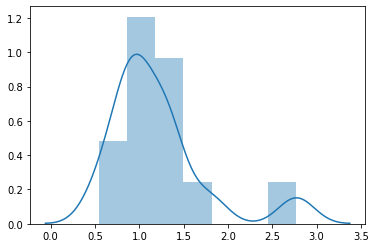

In [7]:
sns.distplot(y_test)
#df2.loc[:,"WEATHER_DELAY"] = np.log1p(df2["WEATHER_DELAY"])
plt.show()

### XGB+GridSearchCV

* 粗調n_estimators

In [8]:
other_params = {'learning_rate':0.1,'n_estimators': 400, 'max_depth': 3, 'min_child_weight': 1,'seed':1850,
               'subsample': 0.8, 'colsample_bytree': 0.8,'colsample_bylevel':1,'reg_alpha':1,'reg_lambda':1,
               'gamma':0.2,'objective':"reg:linear"}

cv_params = {'n_estimators': [50,100,200,300,400,500,600]}


model = xgb.XGBRegressor(**other_params) 
gs = GridSearchCV(model, cv_params, scoring='r2',verbose=2, cv=5, n_jobs=-1)

gs.fit(X_trainval,y_trainval,eval_metric="rmse")  ## 默認rmse

print("参数的最佳取值：:", gs.best_params_)
print("最佳模型得分:", gs.best_score_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[18:43:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
参数的最佳取值：: {'n_estimators': 200}
最佳模型得分: 0.2563039454265911


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    4.8s finished


* 細調n_estimators

In [9]:
other_params = {'learning_rate':0.1,'n_estimators': 400, 'max_depth': 3, 'min_child_weight': 1,'seed':1850,
               'subsample': 0.8, 'colsample_bytree': 0.8,'colsample_bylevel':1,'reg_alpha':1,'reg_lambda':1,
               'gamma':0.2,'objective':"reg:linear"}

cv_params = {'n_estimators': [150,175,200,250,275]}

model = xgb.XGBRegressor(**other_params) 
gs = GridSearchCV(model, cv_params, scoring='r2',verbose=2, cv=5, n_jobs=-1)

gs.fit(X_trainval,y_trainval,eval_metric="rmse")  ## 默認rmse

print("参数的最佳取值：:", gs.best_params_)
print("最佳模型得分:", gs.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  25 | elapsed:    0.0s remaining:    0.1s


[18:43:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
参数的最佳取值：: {'n_estimators': 175}
最佳模型得分: 0.2611058634181719


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.4s finished


* 粗調min_child_weight以及max_depth

In [10]:
other_params = {'learning_rate':0.1,'n_estimators': 175, 'max_depth': 3, 'min_child_weight': 1,'seed':1850,
               'subsample': 0.8, 'colsample_bytree': 0.8,'colsample_bylevel':1,'reg_alpha':1,'reg_lambda':1,
               'gamma':0.2,'objective':"reg:linear"}

cv_params = {'min_child_weight': [1,2,3,4,5],"max_depth":[3,4,5,6,7]}

model = xgb.XGBRegressor(**other_params) 
gs = GridSearchCV(model, cv_params, scoring='r2',verbose=2, cv=5, n_jobs=-1)

gs.fit(X_trainval,y_trainval,eval_metric="rmse")  ## 默認rmse

print("参数的最佳取值：:", gs.best_params_)
print("最佳模型得分:", gs.best_score_) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.5s


[18:44:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
参数的最佳取值：: {'max_depth': 5, 'min_child_weight': 1}
最佳模型得分: 0.3317431459985186


[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    1.0s finished


* 粗調gamma

In [11]:
other_params = {'learning_rate':0.1,'n_estimators': 175, 'max_depth': 5, 'min_child_weight': 1,'seed':1850,
               'subsample': 0.8, 'colsample_bytree': 0.8,'colsample_bylevel':1,'reg_alpha':1,'reg_lambda':1,
               'gamma':0.2,'objective':"reg:linear"}

cv_params = {"gamma":[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}

model = xgb.XGBRegressor(**other_params) 
gs = GridSearchCV(model, cv_params, scoring='r2',verbose=2, cv=5, n_jobs=-1)

gs.fit(X_trainval,y_trainval,eval_metric="rmse")  ## 默認rmse

print("参数的最佳取值：:", gs.best_params_)
print("最佳模型得分:", gs.best_score_) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  55 | elapsed:    0.1s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  40 out of  55 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    0.6s finished


[18:44:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
参数的最佳取值：: {'gamma': 0}
最佳模型得分: 0.3685016567270184


* 粗調subsample

In [12]:
other_params = {'learning_rate':0.1,'n_estimators': 175, 'max_depth': 5, 'min_child_weight': 1,'seed':1850,
               'subsample': 0.8, 'colsample_bytree': 0.8,'colsample_bylevel':1,'reg_alpha':1,'reg_lambda':1,
               'gamma':0,'objective':"reg:linear"}

cv_params = {"subsample":[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}

model = xgb.XGBRegressor(**other_params) 
gs = GridSearchCV(model, cv_params, scoring='r2',verbose=2, cv=5, n_jobs=-1)

gs.fit(X_trainval,y_trainval,eval_metric="rmse")  ## 默認rmse

print("参数的最佳取值：:", gs.best_params_)
print("最佳模型得分:", gs.best_score_) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  55 | elapsed:    0.0s remaining:    0.4s


[18:45:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
参数的最佳取值：: {'subsample': 0.5}
最佳模型得分: 0.3839494048853235


[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    0.3s finished


* 粗調colsample_bytree

In [14]:
other_params = {'learning_rate':0.1,'n_estimators': 175, 'max_depth': 5, 'min_child_weight': 1,'seed':1850,
               'subsample': 0.5, 'colsample_bytree': 0.8,'colsample_bylevel':1,'reg_alpha':1,'reg_lambda':1,
               'gamma':0,'objective':"reg:linear"}

cv_params = {"colsample_bytree":[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}

model = xgb.XGBRegressor(**other_params) 
gs = GridSearchCV(model, cv_params, scoring='r2',verbose=2, cv=5, n_jobs=-1)

gs.fit(X_trainval,y_trainval,eval_metric="rmse")  ## 默認rmse

print("参数的最佳取值：:", gs.best_params_)
print("最佳模型得分:", gs.best_score_) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  50 | elapsed:    0.0s remaining:    0.5s


[18:45:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
参数的最佳取值：: {'colsample_bytree': 0.7}
最佳模型得分: 0.44678463648796346


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.4s finished


* 粗調reg_alpha

In [15]:
other_params = {'learning_rate':0.1,'n_estimators': 175, 'max_depth': 5, 'min_child_weight': 1,'seed':1850,
               'subsample': 0.5, 'colsample_bytree': 0.7,'colsample_bylevel':1,'reg_alpha':1,'reg_lambda':1,
               'gamma':0,'objective':"reg:linear"}


cv_params = {"reg_alpha":[0,1,2,3,4,5,6,7,8,9,10]}

model = xgb.XGBRegressor(**other_params) 
gs = GridSearchCV(model, cv_params, scoring='r2',verbose=2, cv=5, n_jobs=-1)

gs.fit(X_trainval,y_trainval,eval_metric="rmse")  ## 默認rmse

print("参数的最佳取值：:", gs.best_params_)
print("最佳模型得分:", gs.best_score_) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  55 | elapsed:    0.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  40 out of  55 | elapsed:    0.2s remaining:    0.0s


[18:46:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
参数的最佳取值：: {'reg_alpha': 1}
最佳模型得分: 0.44678463648796346


[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    0.3s finished


* 粗調reg_lambda

In [16]:
other_params = {'learning_rate':0.1,'n_estimators': 175, 'max_depth': 5, 'min_child_weight': 1,'seed':1850,
               'subsample': 0.5, 'colsample_bytree': 0.7,'colsample_bylevel':1,'reg_alpha':1,'reg_lambda':1,
               'gamma':0,'objective':"reg:linear"}


cv_params = {"reg_lambda":[0.05, 0.1, 1, 2, 3]}

model = xgb.XGBRegressor(**other_params) 
gs = GridSearchCV(model, cv_params, scoring='r2',verbose=2, cv=5, n_jobs=-1)

gs.fit(X_trainval,y_trainval,eval_metric="rmse")  ## 默認rmse

print("参数的最佳取值：:", gs.best_params_)
print("最佳模型得分:", gs.best_score_) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  25 | elapsed:    0.0s remaining:    0.1s


[18:46:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
参数的最佳取值：: {'reg_lambda': 2}
最佳模型得分: 0.45419524336056866


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.2s finished


* 細調reg_lambda

In [17]:
other_params = {'learning_rate':0.1,'n_estimators': 175, 'max_depth': 5, 'min_child_weight': 1,'seed':1850,
               'subsample': 0.5, 'colsample_bytree': 0.7,'colsample_bylevel':1,'reg_alpha':1,'reg_lambda':2,
               'gamma':0,'objective':"reg:linear"}

cv_params = {"reg_lambda":[1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2]}

model = xgb.XGBRegressor(**other_params) 
gs = GridSearchCV(model, cv_params, scoring='r2',verbose=2, cv=5, n_jobs=-1)

gs.fit(X_trainval,y_trainval,eval_metric="rmse")  ## 默認rmse

print("参数的最佳取值：:", gs.best_params_)
print("最佳模型得分:", gs.best_score_) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  50 | elapsed:    0.0s remaining:    0.5s


[18:46:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
参数的最佳取值：: {'reg_lambda': 2}
最佳模型得分: 0.45419524336056866


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.3s finished


* 粗調learning_rate

In [18]:
other_params = {'learning_rate':0.1,'n_estimators': 175, 'max_depth': 5, 'min_child_weight': 1,'seed':1850,
               'subsample': 0.5, 'colsample_bytree': 0.7,'colsample_bylevel':1,'reg_alpha':1,'reg_lambda':2,
               'gamma':0,'objective':"reg:linear"}

cv_params = {"learning_rate":[0.01, 0.05, 0.07, 0.1]}

model = xgb.XGBRegressor(**other_params) 
gs = GridSearchCV(model, cv_params, scoring='r2',verbose=2, cv=5, n_jobs=-1)

gs.fit(X_trainval,y_trainval,eval_metric="rmse")  ## 默認rmse

print("参数的最佳取值：:", gs.best_params_)
print("最佳模型得分:", gs.best_score_) 

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[18:47:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
参数的最佳取值：: {'learning_rate': 0.1}
最佳模型得分: 0.45419524336056866


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.2s finished


* 使用最佳參數建模

In [19]:
other_params = {'learning_rate':0.1,'n_estimators': 175, 'max_depth': 5, 'min_child_weight': 1,'seed':1850,
               'subsample': 0.5, 'colsample_bytree': 0.7,'colsample_bylevel':1,'reg_alpha':1,'reg_lambda':2,
               'gamma':0.0,'objective':"reg:linear"}


model.fit(X_trainval,y_trainval)  ## 默認rmse


# 訓練集
y_trainval_pred = model.predict(X_trainval)
mse = np.sqrt(mean_squared_error(y_trainval, y_trainval_pred))
print("訓練集mes:",mse)
r2 = metrics.r2_score(y_trainval,y_trainval_pred)
print("訓練集r2:",r2)
print("-----------------------------")

#測試集
y_test_pred = model.predict(X_test)
mse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("測試集mes:",mse)
r2 = metrics.r2_score(y_test, y_test_pred)
print("測試集r2:",r2)

[18:47:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
訓練集mes: 0.22998937422348073
訓練集r2: 0.9628199241418064
-----------------------------
測試集mes: 0.47306302181892795
測試集r2: 0.25792230233665814


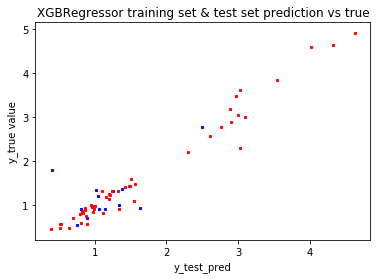

In [20]:
import matplotlib.pyplot as plt

plt.figure()

plt.scatter(y_test_pred,y_test,marker='X',s=5,c='blue')

plt.scatter(y_trainval_pred,y_trainval,marker='X',s=5,c='red')

plt.title('XGBRegressor training set & test set prediction vs true')

plt.xlabel('y_test_pred')

plt.ylabel('y_true value')

plt.show()